In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import scipy

In [2]:
# read in data

data = pd.read_csv("C:\\Users\\darre\\Downloads\\experiment_dataset.csv")
data.info()

# notes
# no null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [3]:
data.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,40.715000,22.713345,0.109145
std,288.819436,13.655557,5.479292,0.022366
min,0.000000,18.000000,7.114806,0.012975
25%,249.750000,28.000000,19.216608,0.094286
50%,499.500000,41.000000,22.506707,0.108944
75%,749.250000,53.000000,26.255950,0.124238
max,999.000000,64.000000,39.395770,0.172728


In [4]:
# check for duplicates
data.duplicated()
# no duplicates found

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Time Spent'}>,
        <Axes: title={'center': 'CTR'}>]], dtype=object)

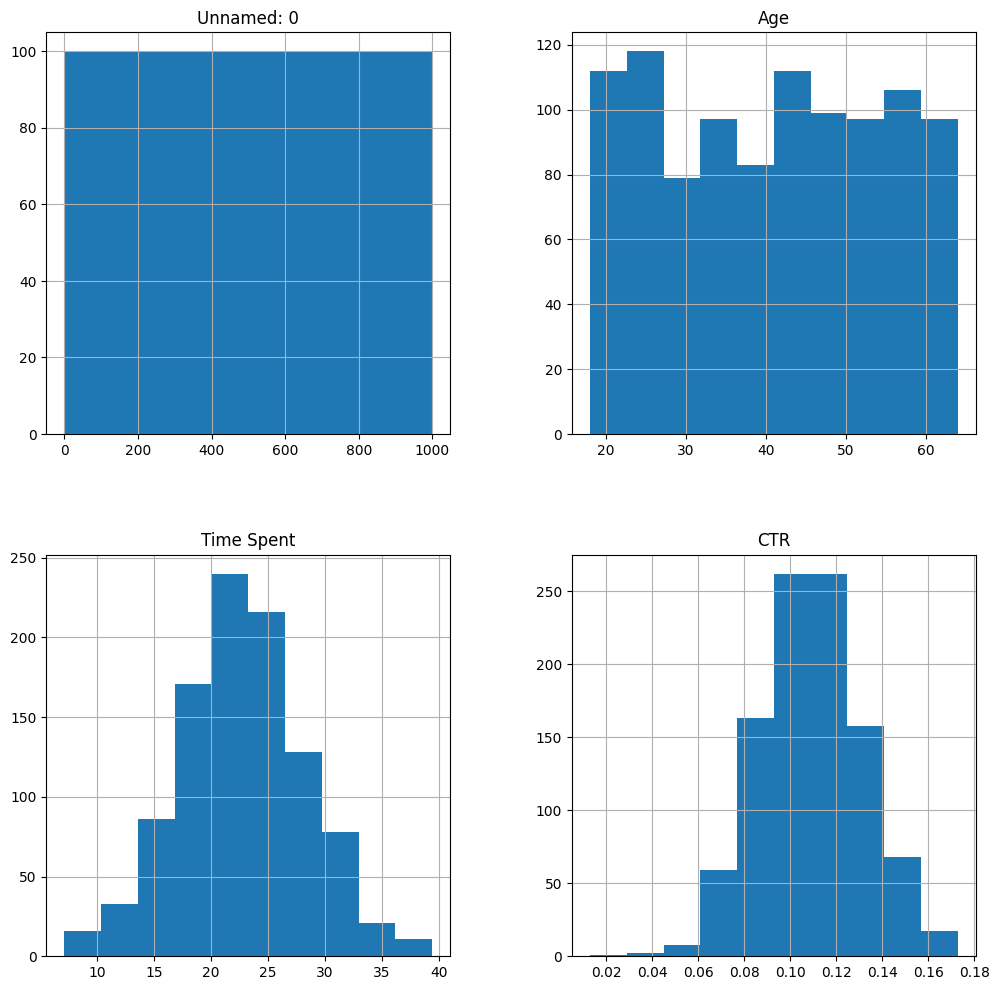

In [5]:
# generate some plots to begin
data.hist(figsize=(12,12))

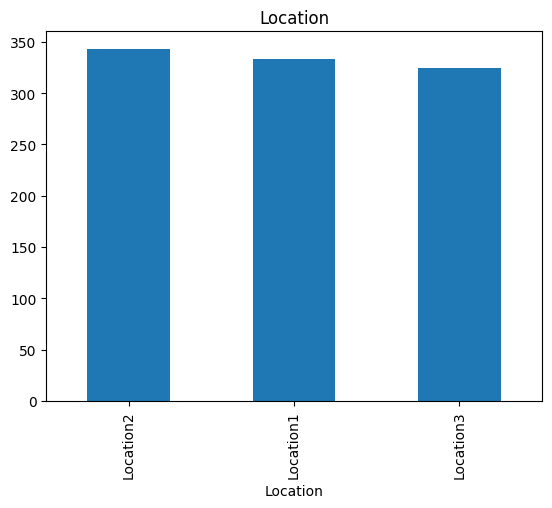

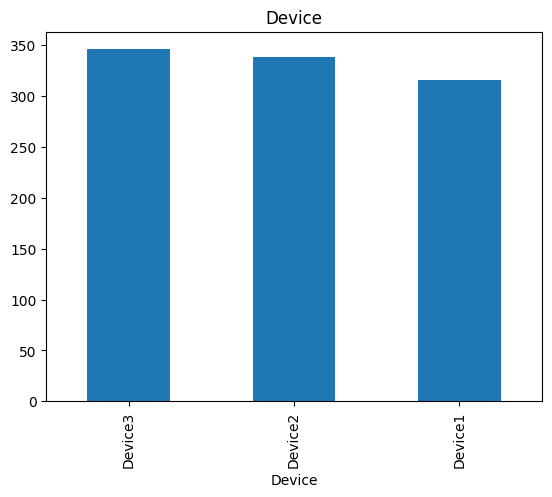

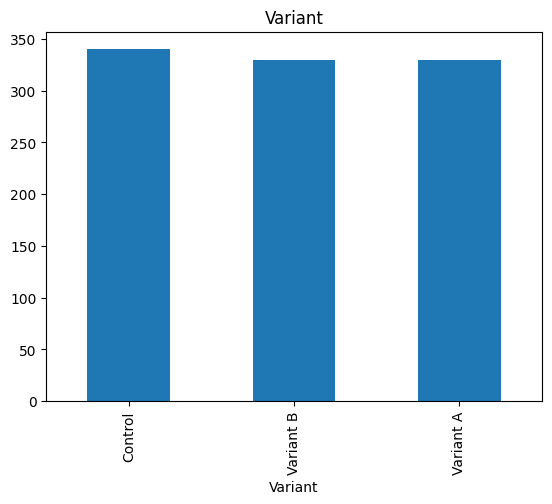

In [6]:
# continue generating plots

data['Location'].value_counts().plot.bar()
plt.title('Location')
plt.show()

data['Device'].value_counts().plot.bar()
plt.title('Device')
plt.show()

data['Variant'].value_counts().plot.bar()
plt.title('Variant')
plt.show()

Histograms of Variant A


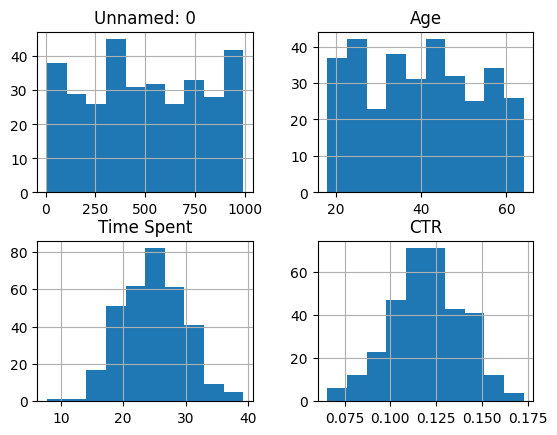

Histograms of Variant B


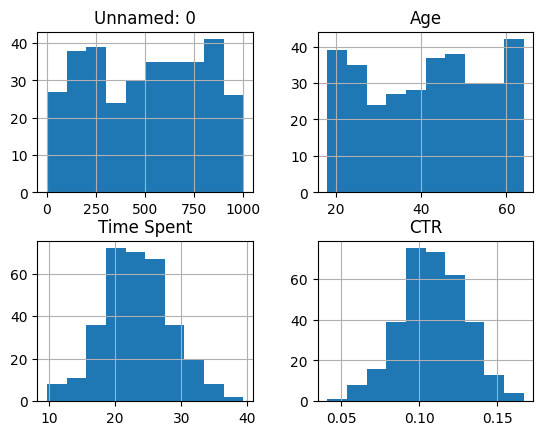

Histograms of Control


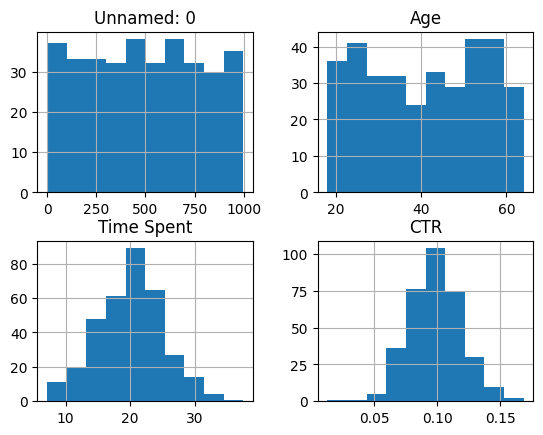

Variant A
       Unnamed: 0         Age  Time Spent         CTR
count  330.000000  330.000000  330.000000  330.000000
mean   503.448485   39.778788   24.805547    0.120269
std    292.544666   13.335836    4.964324    0.020109
min      7.000000   18.000000    7.800901    0.065667
25%    267.250000   28.000000   21.353587    0.107731
50%    492.000000   39.000000   24.955120    0.120203
75%    753.000000   51.000000   28.361732    0.134230
max    993.000000   64.000000   39.246751    0.172728
Variant B
       Unnamed: 0         Age  Time Spent         CTR
count  330.000000  330.000000  330.000000  330.000000
mean   499.427273   41.466667   23.343783    0.108933
std    287.500859   13.931676    5.239965    0.020988
min      1.000000   18.000000    9.681810    0.041402
25%    236.500000   29.000000   19.941617    0.095024
50%    513.500000   42.000000   23.198123    0.109100
75%    748.750000   53.000000   26.604511    0.123861
max    999.000000   64.000000   39.395770    0.166768
Control


In [7]:
# next figure out if either of the variants resulted in an increase in CTR or Time Spent

# start by grouping the data by variant and then check the mean CTR and Time Spent
variants = data.groupby('Variant')

# extract each variant
variant1 = variants.get_group('Variant A')
variant2 = variants.get_group('Variant B')
control = variants.get_group('Control')

# intro plots
print("Histograms of Variant A")
variant1.hist()
plt.show()

print("Histograms of Variant B")
variant2.hist()
plt.show()

print("Histograms of Control")
control.hist()
plt.show()

# descriptive stats per variant
print("Variant A")
print(variant1.describe())
print("Variant B")
print(variant2.describe())
print("Control")
print(control.describe())

# calculate variances of means
controlMeanCTR = control['CTR'].mean()
variant1MeanCTR = variant1['CTR'].mean()
variant2MeanCTR = variant2['CTR'].mean()

controlMeanTS = control['Time Spent'].mean()
variant1MeanTS = variant1['Time Spent'].mean()
variant2MeanTS = variant2['Time Spent'].mean()

print("\nVariance as a percentage between A and B is calculated as ((Mean of A - Mean of B) / Mean of A) * 100")

print("\nVariance in means of CTR between Variant A and Control, Variant B and Control, Variant A and Variant B\n", ((variant1MeanCTR - controlMeanCTR)/variant1MeanCTR)*100, ((variant2MeanCTR - controlMeanCTR)/variant2MeanCTR)*100, ((variant1MeanCTR - variant2MeanCTR)/variant1MeanCTR)*100)

print("\nVariance in means of Time Spent between Variant A and Control, Variant B and Control, Variant A and Variant B\n", ((variant1MeanTS - controlMeanTS)/variant1MeanTS)*100, ((variant2MeanTS - controlMeanTS)/variant2MeanTS)*100, ((variant1MeanTS - variant2MeanTS)/variant1MeanTS)*100)

# Initial Analysis

These insights are in regards to only the CTR and Time Spent columns

* For all variants, the mean and median are approximately same values, meaning the data is normally distributed.  

For Time Spent   

* Variant A has an average CTR that is approximately 18% higher than the average CTR of the Control and approximately 9% higher than the average CTR of Variant B.   

* Variant B has an average CTR that is approximately 10% higher than the average CTR of the Control

For CTR   

* Variant A has an average Time Spent that is approximately 19% greater than the average Time Spent of the Control and approximately 6% greater than the average Time Spent of Variant B.

* Variant B has an average Time Spent that is approximately 14% greater than the average Time Spent of the Control.    

Conclusion: Both variants offer an increase in Time Spent and CTR on average, with Variant A offering larger uplifts than Variant B.

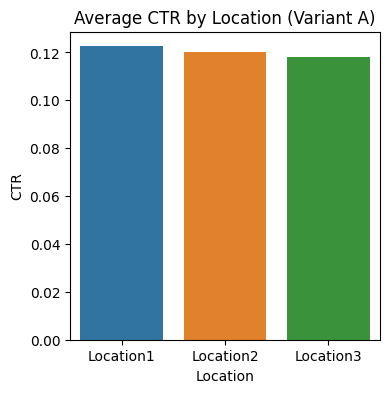

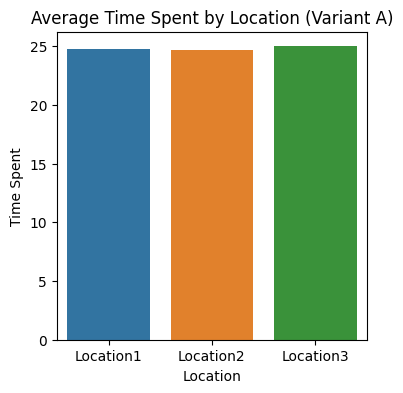

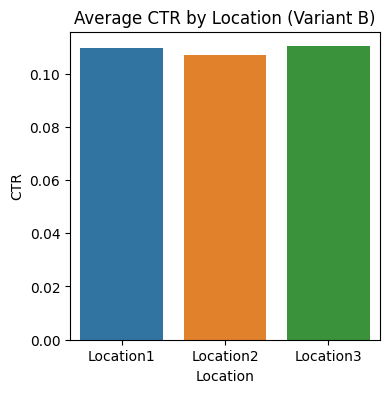

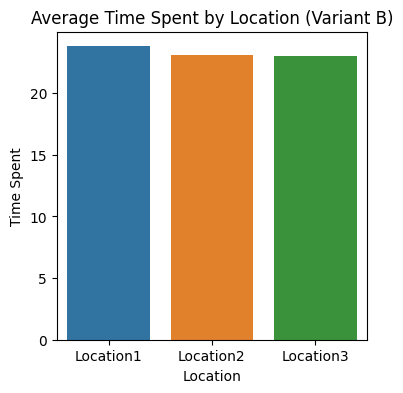

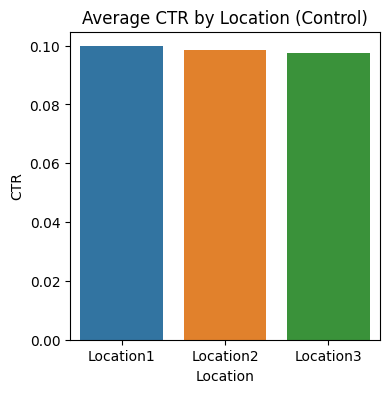

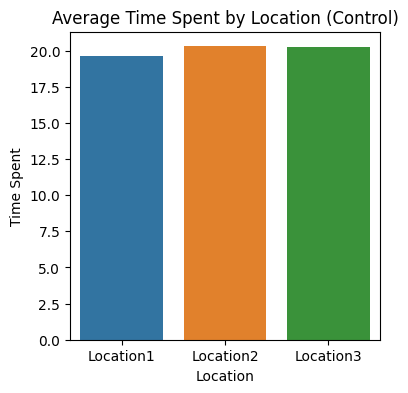

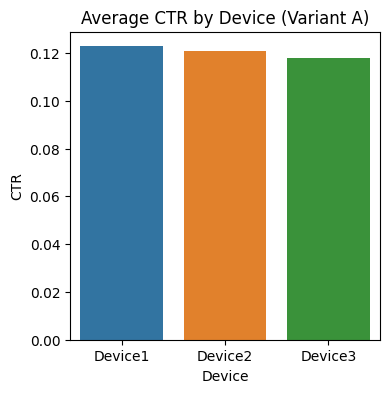

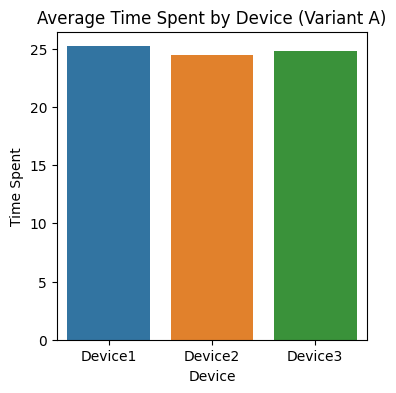

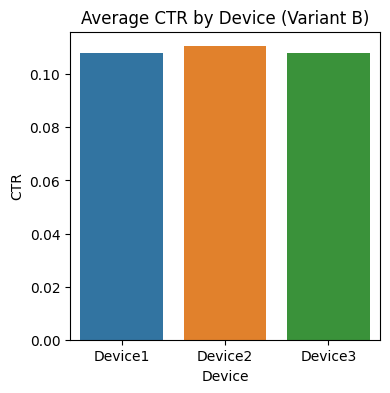

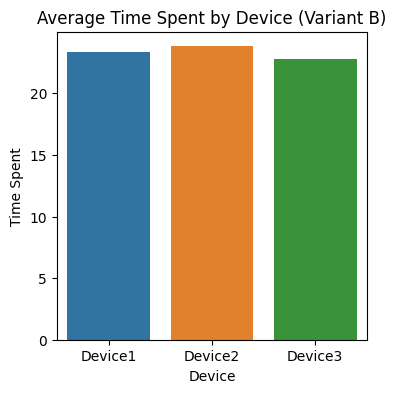

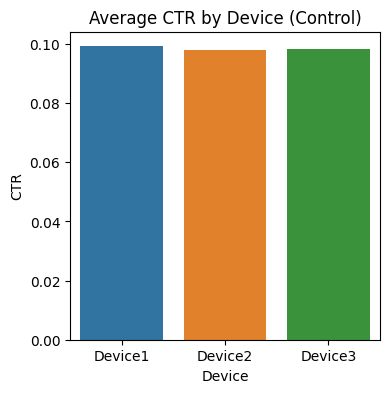

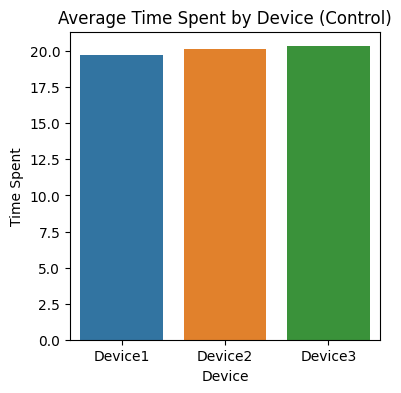

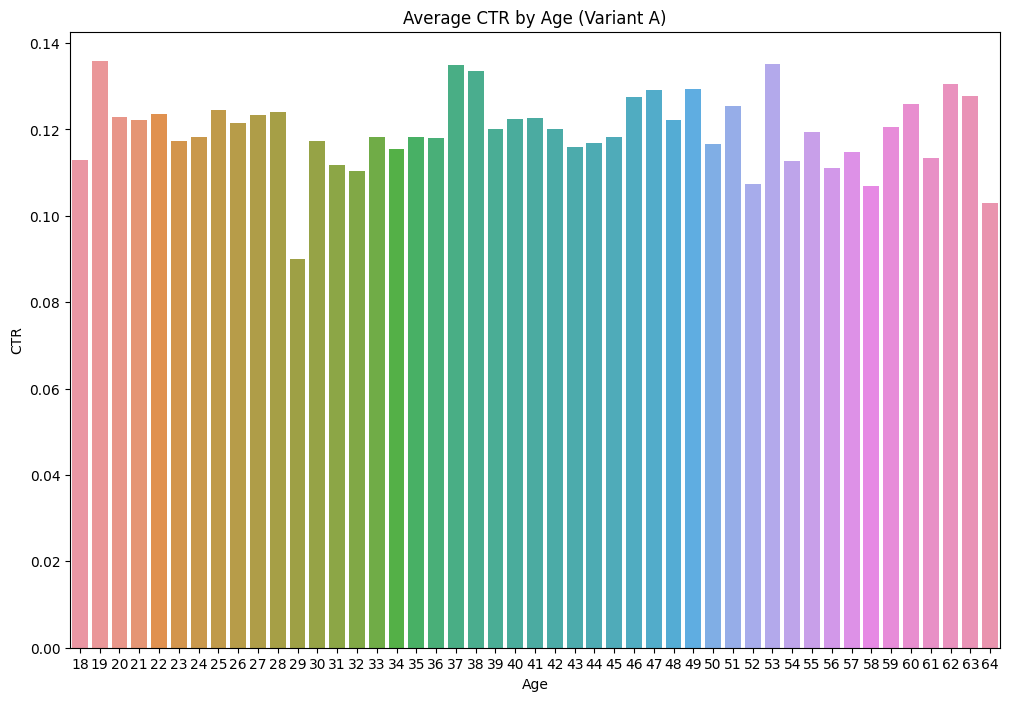

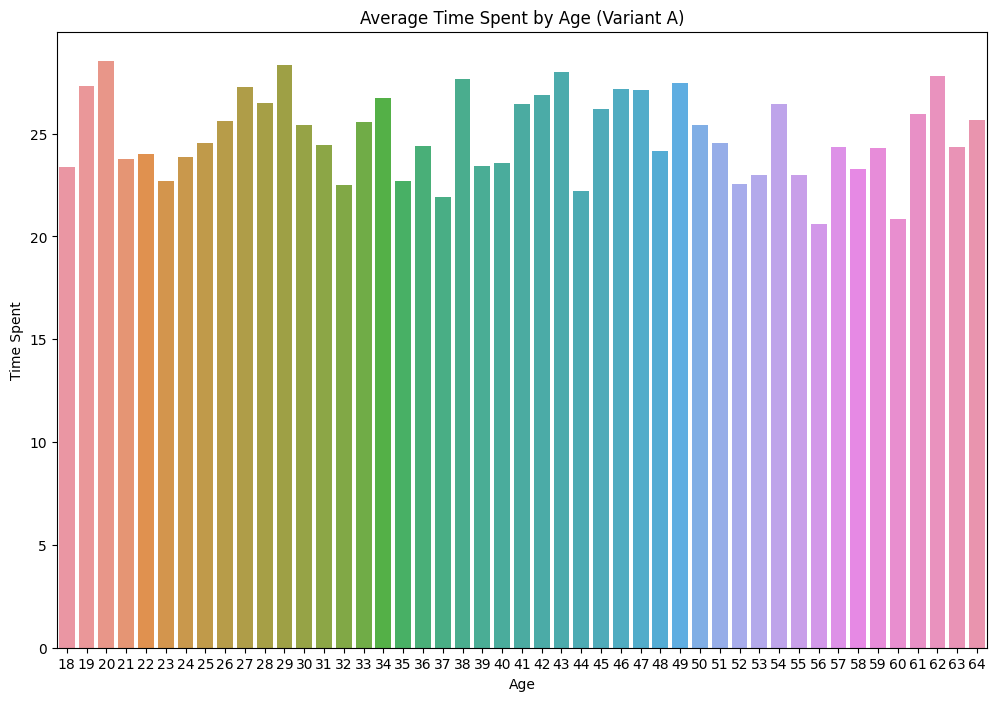

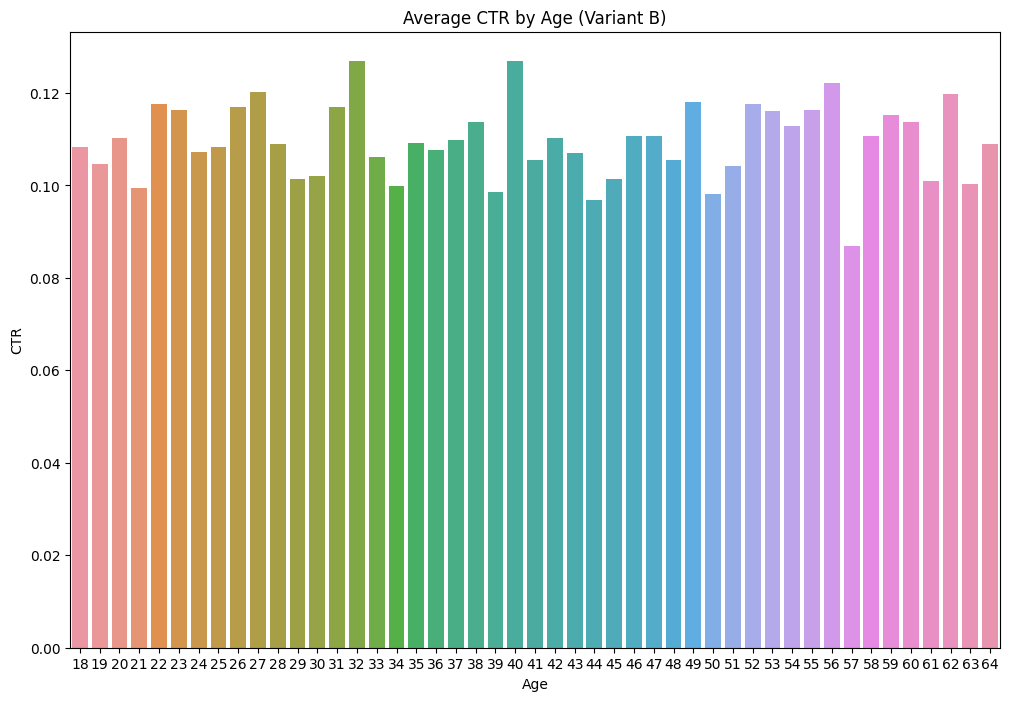

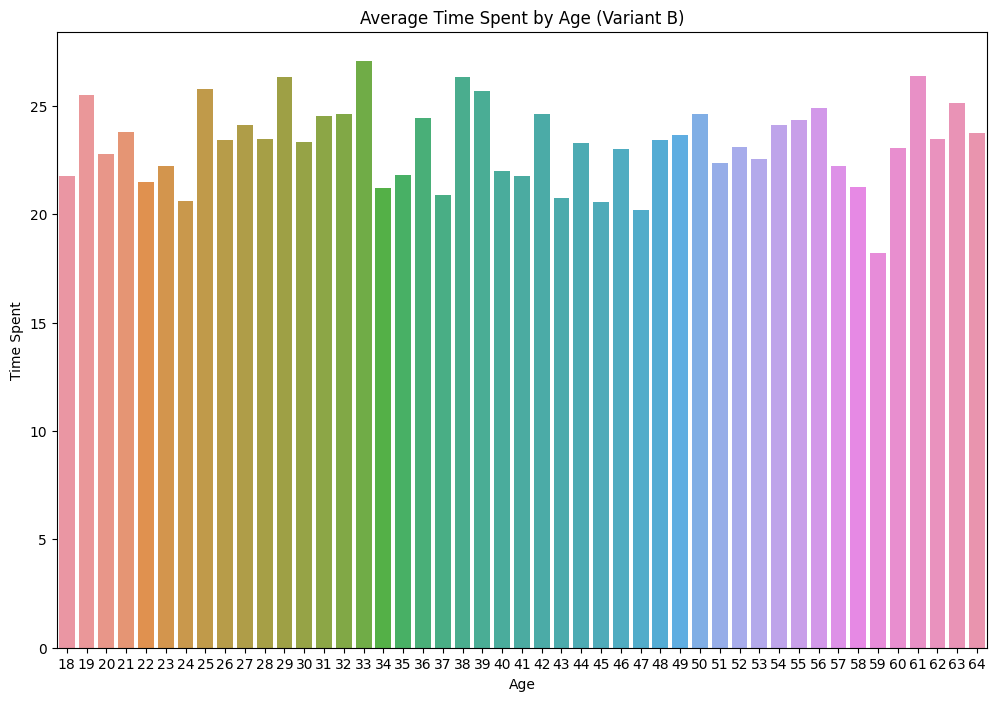

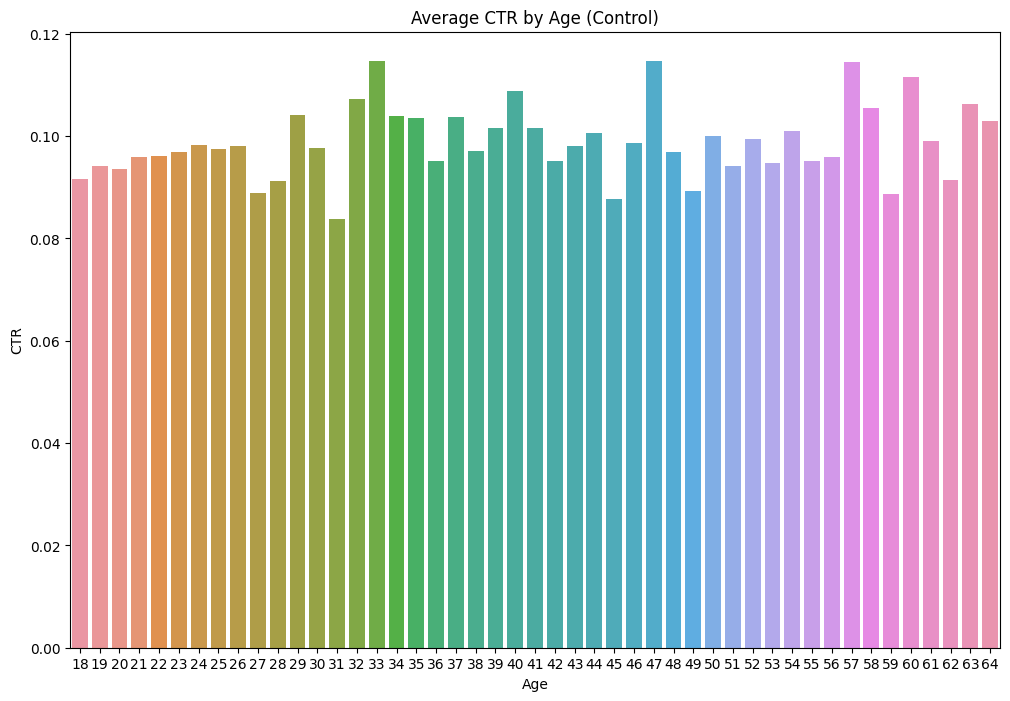

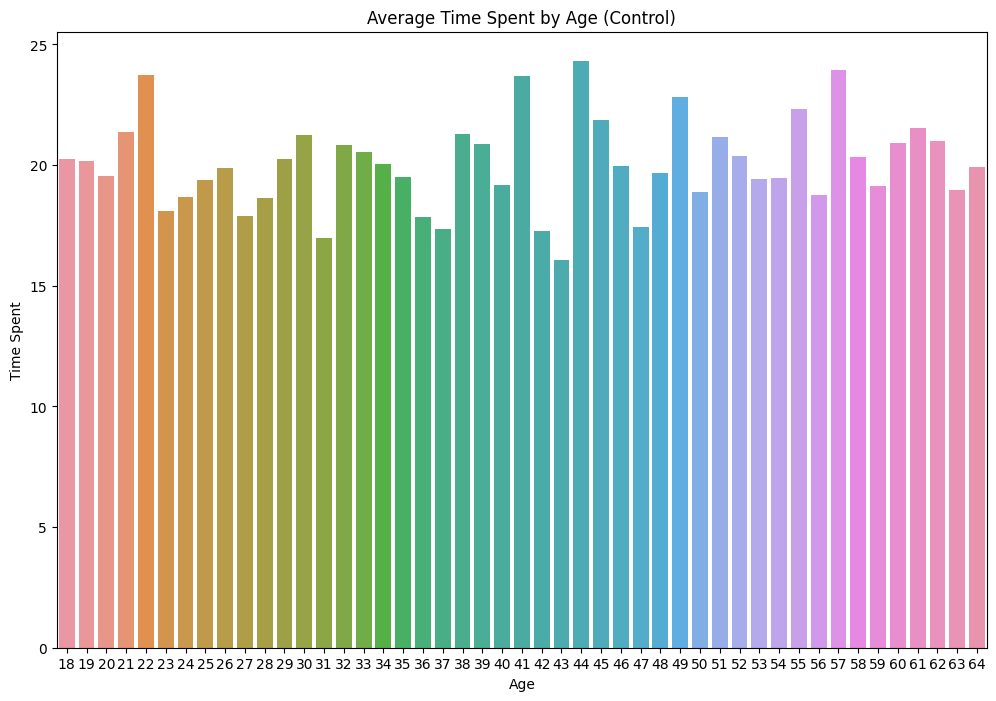

In [8]:
# check if location, age or device have any impact on CTR or Time Spent in each Variant group

location = variant1.groupby('Location')
plt.figure(figsize=(4,4))
plt.title('Average CTR by Location (Variant A)')
sns.barplot(x = location['CTR'].mean().index, y = location['CTR'].mean())
plt.show()

plt.figure(figsize=(4,4))
plt.title('Average Time Spent by Location (Variant A)')
sns.barplot(x = location['Time Spent'].mean().index, y = location['Time Spent'].mean())
plt.show()

location = variant2.groupby('Location')
plt.figure(figsize=(4,4))
plt.title('Average CTR by Location (Variant B)')
sns.barplot(x = location['CTR'].mean().index, y = location['CTR'].mean())
plt.show()

plt.figure(figsize=(4,4))
plt.title('Average Time Spent by Location (Variant B)')
sns.barplot(x = location['Time Spent'].mean().index, y = location['Time Spent'].mean())
plt.show()

location = control.groupby('Location')
plt.figure(figsize=(4,4))
plt.title('Average CTR by Location (Control)')
sns.barplot(x = location['CTR'].mean().index, y = location['CTR'].mean())
plt.show()

plt.figure(figsize=(4,4))
plt.title('Average Time Spent by Location (Control)')
sns.barplot(x = location['Time Spent'].mean().index, y = location['Time Spent'].mean())
plt.show()

location = variant1.groupby('Device')
plt.figure(figsize=(4,4))
plt.title('Average CTR by Device (Variant A)')
sns.barplot(x = location['CTR'].mean().index, y = location['CTR'].mean())
plt.show()

plt.figure(figsize=(4,4))
plt.title('Average Time Spent by Device (Variant A)')
sns.barplot(x = location['Time Spent'].mean().index, y = location['Time Spent'].mean())
plt.show()

location = variant2.groupby('Device')
plt.figure(figsize=(4,4))
plt.title('Average CTR by Device (Variant B)')
sns.barplot(x = location['CTR'].mean().index, y = location['CTR'].mean())
plt.show()

plt.figure(figsize=(4,4))
plt.title('Average Time Spent by Device (Variant B)')
sns.barplot(x = location['Time Spent'].mean().index, y = location['Time Spent'].mean())
plt.show()

location = control.groupby('Device')
plt.figure(figsize=(4,4))
plt.title('Average CTR by Device (Control)')
sns.barplot(x = location['CTR'].mean().index, y = location['CTR'].mean())
plt.show()

plt.figure(figsize=(4,4))
plt.title('Average Time Spent by Device (Control)')
sns.barplot(x = location['Time Spent'].mean().index, y = location['Time Spent'].mean())
plt.show()

plt.figure(figsize=(12,8))
ages = variant1.groupby('Age')
sns.barplot(x = ages['CTR'].mean().index, y = ages['CTR'].mean())
plt.title('Average CTR by Age (Variant A)')
plt.show()

plt.figure(figsize=(12,8))
plt.title('Average Time Spent by Age (Variant A)')
sns.barplot(x = ages['Time Spent'].mean().index, y = ages['Time Spent'].mean())
plt.show()

plt.figure(figsize=(12,8))
ages = variant2.groupby('Age')
sns.barplot(x = ages['CTR'].mean().index, y = ages['CTR'].mean())
plt.title('Average CTR by Age (Variant B)')
plt.show()

plt.figure(figsize=(12,8))
plt.title('Average Time Spent by Age (Variant B)')
sns.barplot(x = ages['Time Spent'].mean().index, y = ages['Time Spent'].mean())
plt.show()

plt.figure(figsize=(12,8))
ages = control.groupby('Age')
sns.barplot(x = ages['CTR'].mean().index, y = ages['CTR'].mean())
plt.title('Average CTR by Age (Control)')
plt.show()

plt.figure(figsize=(12,8))
plt.title('Average Time Spent by Age (Control)')
sns.barplot(x = ages['Time Spent'].mean().index, y = ages['Time Spent'].mean())
plt.show()

# Minor Detials

The output of the cell above has been collapsed for neatness.    

It was found that Device and Location largely have no effect on the average CTR or Time Spent per Variant.    

There is variation in the average CTR and Time Spent by different ages in each Variant group, but there does not seem to be any discernable trend present.   

# Statistical Testing

In this case it is not appropriate to apply a Paired T test, since we do not have before/after data of the same subjects. Or at least given the description of the data it is not fair to assume that the data contains before/after effects of the control and then the variants on the same subjects.   

Thus an Indepedent Two Sample T test will be used to determine if there is a significant statistical difference between the Control group and the Vairants.    

We will begin working with Variant A and the control. The null hypothesis will be that the Control and Variant A group have the same means for CTR and Time Spent, thus a small p value (<= 0.05) will indicate that this is false and the groups are significantly statistically different.   

Next we will examine Variant B and the control. The null hypothesis will be that the Control and Variant B group have the same means for CTR and Time Spent, thus a small p value (<= 0.05) will indicate that this is false and the groups are significantly statistically different.    


SciPy will be used to conduct the T tests and obtain the p values.

In [9]:
# T test for variant A and control
ctrA = scipy.stats.ttest_ind(variant1['CTR'], control['CTR'])
timeSpentA = scipy.stats.ttest_ind(variant1['Time Spent'], control['Time Spent'])
print("Variant A and Control CTR Results:", ctrA)
print("Variant A and Control Time Spent Results:", timeSpentA)

# T test for variant B and control
ctrB = scipy.stats.ttest_ind(variant2['CTR'], control['CTR'])
timeSpentB = scipy.stats.ttest_ind(variant2['Time Spent'], control['Time Spent'])
print("Variant B and Control CTR Results:", ctrB)
print("Variant B and Control Time Spent Results:", timeSpentB)

Variant A and Control CTR Results: Ttest_indResult(statistic=13.829424737499187, pvalue=1.9602781373243157e-38)
Variant A and Control Time Spent Results: Ttest_indResult(statistic=12.142363487472364, pvalue=8.488565644996449e-31)
Variant B and Control CTR Results: Ttest_indResult(statistic=6.4718143491783255, pvalue=1.8743198199982106e-10)
Variant B and Control Time Spent Results: Ttest_indResult(statistic=8.174237395991806, pvalue=1.496358076285182e-15)


# T Test Results

Clearly all of the P values are well below 0.05 and thus the means of CTR and Time Spent in the variants are significantly statistically different than in the control group. We reject the null hypothesis.    

Note that the P values of the Variant A and control group are many orders of magnitude smaller than the P values of Variant B and the control group. This indicates (and is supported by previous analysis) that there is a greater statistical difference between Variant A and the control group than Variant B and the control group in terms of the mean values of CTR and Time Spent.

# Part 3

Through an exploratory analysis it was found that both Variants had on average a higher Time Spent and CTR than the control group. Furthermore it was found that Variant A offered a higher average Time Spent and CTR than Variant B. This was confirmed via statistical testing. My recommendation is that the engineering team deploy Variant A.

# Part 4 - Recommendation

The roll-out of the feature could be done in stages, and each stage would provide the feature to a new group of users. This would allow for user response to be gauged in smaller groups, which will prevent an adverse response from the entire user base and allow us to see if perhaps one particular demographic would greatly prefer the original feature.

I will begin by explaining some of the rationale and then explicitly state each step of the rollout plan. Looking at some of the earlier generated plots (the ones above the markdown cell entitled 'Minor Details'), we can gain some insight into how users perceived Variant A of the feature. 

* Location 1 had the highest average CTR and Location 3 had the highest average Time Spent, however all of the locations varied very slightly. Given that each location shares such similar values, location will not be used to determine the demographic stages that the product must be rolled out in.    

* Device 1 had both a higher CTR and Time Spent on average than the other devices. Thus Variant A should be rolled out to users on Device 1 first, as they have already been shown to be responsive to this Variant. Responsive as in they have shown an increased CTR and Time Spent, they are likely to be pleased with the update

* Ages 29, 52, 58 and 64 have lower CTRs on average than other ages. Furthermore, ages 18-28 and 30-49 have a high average CTR, while ages 50-64 had a lower average CTR. The Variant could be rolled out to ages 18-28 an 30-49 first as they have shown an increase in average CTR while using the feature and are likely to have a positive response to it. The Variant could then later be rolled out for people aged 29 and 50-64 later, as they may have a slightly negative response to the feature. The feature likely could be rolled out to people aged 29 at that sametime as the first group, as the low CTR could be considered an oddity, but for completeness their rollout will be delayed.

* Average Time Spent per age follows a somewhat similar to trend as average CTR. Ages 18 - 49 have a higher average Time Spent while ages 50-64 have a lower average Time Spent. This allows for the rollout pattern described in the average CTR to be followed.

Rollout Plan    

* The first set of users to receive the new feature should be the ones aged 18-28 and 30-49 who reside in any location but use device 1. This group has shown an increased average CTR and Time Spent during the experiment phase and is likely to receive the new feature in a positive way.

* After approximately 2 weeks of the new feature being out, customer feedback should be reviewed. If the reviews / feedback is mostly positive, then continue to the next stage. If the reviews are negative and request changes, then stop and attempt to implement changes that customers are looking for. If the reviews are negative with no requested changes, then stop and review the possibility of bugs in the implementation or reverting back to the original feature.

* The next stage would be to roll out the feature to people aged 18-28 and 30-49 who reside in any location and use any device. The other device users had slightly lower average CTRs and Time Spent, so they may have a slightly less positive review of the Variant of the feature than the previous group. That being said, they still will likely receive the new feature in a positive way as they did respond better than other aged users.   

* Once again after 2 weeks, customer feedback should be reviewed the way it was described above.

* The penultimate stage would be to roll out the feature to people aged 50-64 and 29 who reside in any location and use device 1. This age group of users had lower CTRs and Time Spent on Average, but those on Device 1 typically exhibited higher CTRs and Time Spent on average so they also have a positive response to the new feature.

* Once again after two weeks the customer feedback should be reviewed as it was described above.

* The final group of users would be those aged 50-64 and 29 who reside in any location and use any device. This group would have had the lowest average CTR and Time Spent during the experiment and would be the most likely to have a negative response to the new feature. It is best that they receive the feature last as there has been several testing groups before them providing feedback which would likely ensure that the feature is in it's best possible form by the time it is rolled out to them. Thus ensuring there is the best chance possible that they will not have a negative response to the feature.

* The rollout is now completed. If there are any users who somehow have not yet received the new feature, then they should have it rolled out to them immediately. 